In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [22]:
np.random.seed(2)

X = np.linspace(-3, 3, 30).reshape((30, 1))

y = 0.5 * X ** 2 + X + 2 + np.random.normal(size=(30, 1))

In [32]:
def gradient_descent(
	X: np.ndarray[float],
	y: np.ndarray[float],
	n_iterations: int = 2000,
	nu: float = 1e-2
):
	X_mean = X.mean()
	X_std = X.std()
	X_norm = (X - X_mean) / X_std

	X_aug = np.hstack([np.ones((X_norm.shape[0], 1)), X_norm])

	w = np.zeros(shape=(X_aug.shape[1]))

	for _ in range(n_iterations):
		grad = (2 / X_aug.shape[0]) * X_aug.T @ (X_aug @ w - y.ravel())
		w -= nu * grad
	
	return w

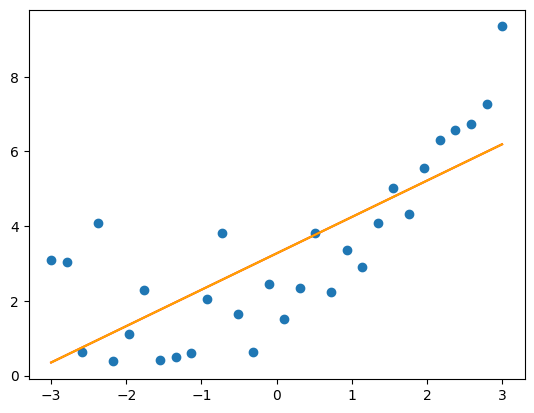

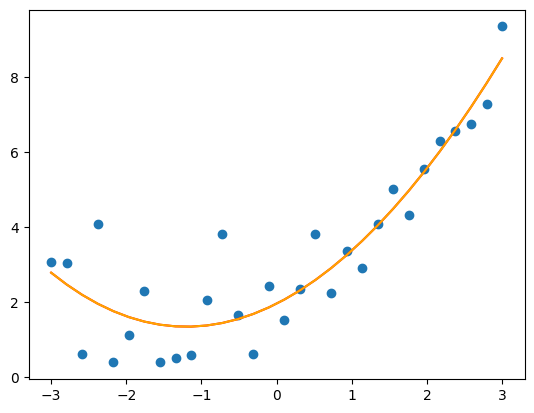

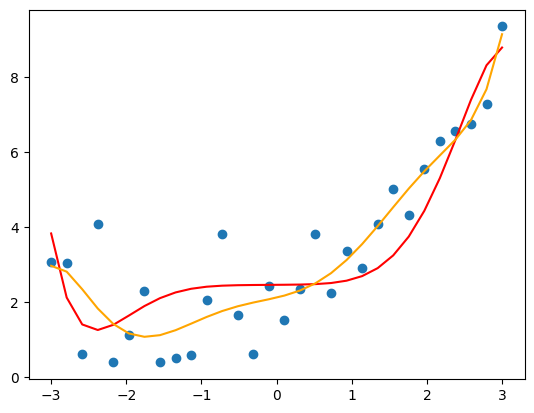

In [62]:
for degree in [1, 3, 7]:
	poly = PolynomialFeatures(degree=degree, include_bias=False)
	X_poly = poly.fit_transform(X)
	w = gradient_descent(X_poly, y, nu=1e-1, n_iterations=10_000)

	X_mean = X_poly.mean()
	X_std = X_poly.std()
	X_norm = (X_poly - X_mean) / X_std
	X_aug = np.hstack([np.ones((X_norm.shape[0], 1)), X_norm])
	y_pred_manual = X_aug @ w

	model = LinearRegression().fit(X_poly, y)
	y_pred_sklearn = model.predict(X_poly)

	plt.figure()
	plt.scatter(X, y, label='Данные')
	plt.plot(X, y_pred_manual, color='red')
	plt.plot(X, y_pred_sklearn, color='orange')